## Part I - Finding the Best Two Markets to Advertise In
#### Project Summary
As an e-learning company that offers courses mainly in web and mobile development, but also courses in other domains such as data science, game development and etc, we want to promote our products. In order to advertise these products an analysis needs to be conducted to determine which two markets our money should be invested in for the best return 
#### Project Goal
Using statistical metrics, find which two markets will yield the best return on investment for advertising our products

## Part II - Understanding the Data
#### Using a Relatable Survey
Due to the fact that surveying markets is expensive, a good alternative is using public survey data from freeCodeCamp which is a free e-learning platform that offers courses on web develpment. The advantage to using this popular Medium publication is that their survey attracts new coders with varying interests. The survey data is publicaly available in [this Github repository](https://github.com/freeCodeCamp/2017-new-coder-survey).
#### Exploring the Data

In [1]:
import pandas as pd
data=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
# low_memory = False to silence dtypes warning
#alternatively, can do:
    #direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
    #pd.read_csv(direct_link, low_memory = 0)
print(data.shape)
pd.options.display.max_columns = 200 
data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

#### Identifying and Describing Relevant Columns for Analysis

In [2]:
#print all column names
data.columns.tolist();

In [3]:
#investigate the number of responses for each column
print(data.info(),'\n')
#determine which column's are most filled with non NaN values
pd.options.display.max_rows = 4000 #not truncate
print((round(data.notnull().sum(axis=0)/data.shape[0]*100,2)).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB
None 

ID.x                             100.00
Part1StartTime                   100.00
Part1EndTime                     100.00
NetworkID                        100.00
IsSoftwareDev                     99.41
AttendedBootcamp                  97.44
MonthsProgramming                 94.00
HoursLearning                     91.96
MoneyForLearning                  91.21
Part2EndTime                      86.62
Part2StartTime                    86.62
ID.y                              86.62
Gender                            85.03
CountryCitizen                    84.63
HasHighSpdInternet                84.62
SchoolDegree                      84.56
Age                               84.55
CityPopulation                    84.48
LanguageAtHome                    84.42
CountryLive                       84.38
MaritalStatu

In [4]:
#Find all column names that start with 'JobInterest'
JobInterest = [col for col in data.columns if 'JobInterest' in col]
#print list with new line as sep
#print(*JobInterest, sep = "\n") 
# print((round(data[JobInterest].sum(axis=0)/data.shape[0]*100,2)).sort_values(ascending=False))
JobInterestNotNull=(round(data[data['JobRoleInterest'].notnull()][JobInterest].sum(axis=0)/data.shape[0]*100,2)).sort_values(ascending=False)
print(JobInterestNotNull)

JobInterestFullStack    23.06
JobInterestFrontEnd     19.42
JobInterestBackEnd      15.24
JobInterestMobile       12.67
JobInterestDataSci       9.02
JobInterestGameDev       8.94
JobInterestUX            8.07
JobInterestInfoSec       7.27
JobInterestDataEngr      6.86
JobInterestDevOps        5.09
JobInterestProjMngr      4.46
JobInterestQAEngr        2.72
dtype: float64


#### Possibly Useful Columns and Not Null Value Percentages
|Name|%|
|---|----|
|IsSoftwareDev|                     99.41|
|AttendedBootcamp|                  97.44|
|MonthsProgramming|                 94.00|
|MoneyForLearning|                  91.21|
|IsUnderEmployed|                   50.75|
|Income|                            41.94|
|FirstDevJob|                       24.80|
|JobInterest Cols|                -| 
|EmploymentFieldOther|               5.93|

## Part III - Checking for Sample Representativity
Determining if the sample we have is representative for our population of interest. 
- **First:** determine what percentage of participants entered a job interest. 
- **Second:** determine how many of the participants who enetered a job interest have more than one job interest. 
- **Third:** determine what percentage of participants who entered a job interest are interested in web or mobile develpment

In [5]:
#The 'JobRoleInerest' Column makes a list of all the
    #'JobInterest'+'Name' Boolean column names
#Of the people who answered (no NaN values),
    #this is the percentage of JobInterests (single and combos)
print('percentage of participants who did not enter a job interest:\n',
    round((data.JobRoleInterest.value_counts(normalize=True,dropna=False)*100),2)[0])
#dropna=False: find that 61.5% are null values, meaning only 38.5% answered

percentage of participants who did not enter a job interest:
 61.53


In [6]:
#Find how interests people have
interest_notnull=data.JobRoleInterest.dropna().str.split(',')
# print(interest_notnull[2])
# print(len(interest_notnull[2]))
freq_interest=interest_notnull.apply(lambda x:len(x))
# print(freq_interest[2])
ft=freq_interest.value_counts(ascending=False,normalize=True).sort_index()*100
print('percentages of responses with this number of interests:\n')
print(ft.round(2))
print('percentage of responses that have 1+ interest: ',ft[1:].sum().round(2))

percentages of responses with this number of interests:

1     31.65
2     10.88
3     15.89
4     15.22
5     12.04
6      6.72
7      3.86
8      1.76
9      0.99
10     0.47
11     0.19
12     0.30
13     0.03
Name: JobRoleInterest, dtype: float64
percentage of responses that have 1+ interest:  68.35


Our company mainly offers courses in web and mobile development, so we can take a look at how many responses include web and/or mobile develpment

In [7]:
interest_notnull_notsplit=data.JobRoleInterest.dropna()
length=len(interest_notnull_notsplit)
web=interest_notnull_notsplit.str.contains('Web Developer')
mobile=interest_notnull_notsplit.str.contains('Mobile Developer')
web_and_mobile=(web==True)&(mobile==True)
web_or_mobile=interest_notnull_notsplit.str.contains('Web Developer|Mobile Developer')

webP=round(web.sum()/length,4)*100
mobileP=round(mobile.sum()/length,4)*100
web_and_mobileP=round(web_and_mobile.sum()/length,4)*100
web_or_mobileP=round(web_or_mobile.sum()/length,4)*100

print('web% ',webP,'\n',
      'mobile% ', mobileP,'\n',
      'web&mobile% ',web_and_mobileP, '\n',
      'web/mobile% ',web_or_mobileP)

web%  82.61 
 mobile%  32.95 
 web&mobile%  29.32 
 web/mobile%  86.24000000000001


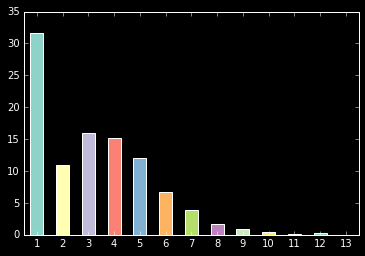

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
ft.plot(kind='bar',rot=0)

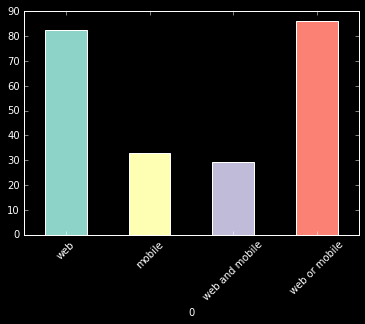

In [9]:
df_dev=[   ['web',webP],   ['mobile',mobileP], 
    ['web and mobile',web_and_mobileP],   ['web or mobile',web_or_mobileP]]
df_dev=pd.DataFrame(df_dev).set_index(0)
df_dev.plot(y=1,kind='bar',rot=45,legend=None)

#### Findings
- About a third of participants enetered a job interest
- A third of participants who entered a job interest have only one job interest
- About 85% of participants who entered a job interest are interested in web or mobile development

Our population are participants who are interested in the courses we offer, with more than 85% of participants who gave a job interest interested in our main product, this data is a representative sample of the population. The only hesitation is that only a third of the participants identified a job interest

## Part IV - New Coders - Locations and Densities

#### Using only Participants who Identified a Job Interested

In [10]:
IDjob=data[data['JobRoleInterest'].notnull()].copy()
print(data.shape, IDjob.shape)

(18175, 136) (6992, 136)


#### Frequency Table for Country Participants Live in

In [11]:
fq_abs=IDjob.CountryLive.value_counts(); #absolute
fq_rel=IDjob.CountryLive.value_counts(normalize=True)*100; #relative
fq=pd.DataFrame(data={'fq_abs':fq_abs,'fq_rel':fq_rel})
fq

,fq_abs,fq_rel
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


In [12]:
fq.shape

(137, 2)

#### Findings
- Based on the results the two markets to choose are the US and India
- It would be insightful to:
    - count how many participants of the ones who selected a job interest entered the country they live in
    - View the country all participants live in in this data set
    - Dig deeper into what area, state, province, city to narrow in on
    - Determine the commitment level and willingness to pay for courses in each market

In [13]:
print(round(IDjob.CountryLive.notnull().sum()/len(IDjob)*100,3))

97.797


In [14]:
fq_absD=data.CountryLive.value_counts(); #absolute
fq_relD=data.CountryLive.value_counts(normalize=True)*100; #relative
fqD=pd.DataFrame(data={'fq_abs':fq_absD,'fq_rel':fq_relD})
fqD

,fq_abs,fq_rel
United States of America,5791,37.760824
India,1400,9.128847
United Kingdom,757,4.936098
Canada,616,4.016693
Brazil,364,2.373500
Germany,324,2.112676
Poland,265,1.727960
Russia,263,1.714919
Australia,259,1.688837
France,228,1.486698


## Part V - Spending Money for Learning
Although, the market decision will not be only based on the countries participants live in, we will narrow the investigation to the US, India, the UK and Canada because:
- These countries have the highest absolute frequencies in the sample and thus these countries have a decent amount of data for each
- The courses are writtin in English and English is the official language in all four of these countries

In [15]:
IDjob['MonthsProgramming'].replace(0,1,inplace=True)
IDjob['moneypermonth']=IDjob['MoneyForLearning']/IDjob['MonthsProgramming']
nullmpm=IDjob['moneypermonth'].isnull().sum()
print(nullmpm)
dfmarket=IDjob[IDjob['moneypermonth'].notnull()]
dfmarket=dfmarket[dfmarket['CountryLive'].notnull()]
grouped=dfmarket.groupby(['CountryLive'])['moneypermonth'].mean()
top4=grouped[:][['United States of America','India','United Kingdom',
                'Canada']]
top4

675


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: moneypermonth, dtype: float64

In [16]:
topcountries=['United States of America','India','United Kingdom','Canada']
#https://stackoverflow.com/questions/14430454/python-how-to-return-list-of-booleans-to-see-if-elements-of-one-list-in-another
topcountriesindex = [x in topcountries for x in IDjob['CountryLive'] ]

In [17]:
A=IDjob[topcountriesindex]
A.moneypermonth.mean() #weighted mean

196.99019584532198

In [18]:
top4.mean() #mean of top 4 countries not correct because not weighted

130.53609548667626

In [19]:
top4.median() #Unweighted

124.3059714772762

In [20]:
top4.mode()[0] #Unweighted

45.5344431489751

#### Findings
- For money spent per month on coding, the UK is lower than Canada even though there is more interest from the UK
- Based on socio-economical metrics like GDP per capita, the expectation is that UK and Canada would have spent more on learning than those in India
    - It is possible that India has a higher percentage of individuals interested in coding than the UK and Canada
    - Another possibility is that the data is not representative of the countries

## Part VI - Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



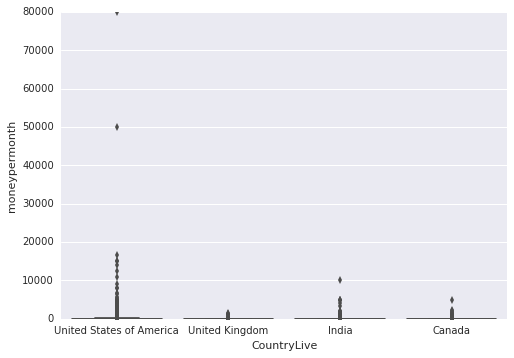

In [ ]:
import seaborn as sns
plt.figure()
sns.boxplot(data=A, x='CountryLive', y='moneypermonth')

In [ ]:
nooutliers=A[A['moneypermonth']<20000]
nooutliers

In [ ]:
nooutliers.groupby('CountryLi')